In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## Load the dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(1009, 14)
(300, 13)


In [4]:
train_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.0000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.0000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.2500,NaN,Q,16,NaN,NaN
5,2.0,0.0,"Gaskell, Mr. Alfred",male,16.0,0.0,0.0,239865,26.0000,NaN,S,NaN,NaN,"Liverpool / Montreal, PQ"
6,2.0,0.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,S.O./P.P. 2,21.0000,NaN,S,NaN,NaN,"Ilfracombe, Devon"
7,1.0,1.0,"Leader, Dr. Alice (Farnham)",female,49.0,0.0,0.0,17465,25.9292,D17,S,8,NaN,"New York, NY"
8,1.0,0.0,"Brandeis, Mr. Emil",male,48.0,0.0,0.0,PC 17591,50.4958,B10,C,NaN,208.0,"Omaha, NE"
9,2.0,0.0,"Wheeler, Mr. Edwin ""Frederick""",male,NaN,0.0,0.0,SC/PARIS 2159,12.8750,NaN,S,NaN,NaN,NaN


In [5]:
features = test_data.columns
print(features)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


# Data Preprocessing and visualisation

### 1. Drop unecessary columns

In [7]:
drop_columns = ['name' , 'ticket' , 'cabin' , 'embarked' , 'body' , 'home.dest', 'boat']
train_data.drop(drop_columns , axis = 1 , inplace=True)
test_data.drop(drop_columns , axis = 1 , inplace=True)

In [8]:
train_data

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,NaN,0.0,0.0,7.7500
1,2.0,0.0,male,39.0,0.0,0.0,26.0000
2,2.0,1.0,female,40.0,0.0,0.0,13.0000
3,3.0,1.0,female,31.0,1.0,1.0,20.5250
4,3.0,1.0,female,NaN,2.0,0.0,23.2500
...,...,...,...,...,...,...,...
1004,1.0,1.0,male,40.0,0.0,0.0,31.0000
1005,3.0,0.0,female,37.0,0.0,0.0,9.5875
1006,1.0,1.0,female,23.0,1.0,0.0,113.2750
1007,3.0,1.0,male,12.0,1.0,0.0,11.2417


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   object 
 3   age       812 non-null    float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1008 non-null   float64
dtypes: float64(6), object(1)
memory usage: 55.3+ KB


### 2.Handling Misssing values

In [10]:
train_data = train_data.fillna(train_data['age'].mean())
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   object 
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1009 non-null   float64
dtypes: float64(6), object(1)
memory usage: 55.3+ KB


In [11]:
train_data['age'] = np.round(train_data['age'])

In [12]:
train_data

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,30.0,0.0,0.0,7.7500
1,2.0,0.0,male,39.0,0.0,0.0,26.0000
2,2.0,1.0,female,40.0,0.0,0.0,13.0000
3,3.0,1.0,female,31.0,1.0,1.0,20.5250
4,3.0,1.0,female,30.0,2.0,0.0,23.2500
...,...,...,...,...,...,...,...
1004,1.0,1.0,male,40.0,0.0,0.0,31.0000
1005,3.0,0.0,female,37.0,0.0,0.0,9.5875
1006,1.0,1.0,female,23.0,1.0,0.0,113.2750
1007,3.0,1.0,male,12.0,1.0,0.0,11.2417


In [13]:
test_data = test_data.fillna(np.round(test_data['age'].mean()))
test_data

,pclass,sex,age,sibsp,parch,fare
0,1.0,male,36.0,0.0,0.0,26.3875
1,3.0,female,30.0,8.0,2.0,69.5500
2,1.0,male,30.0,0.0,0.0,50.0000
3,2.0,male,34.0,0.0,0.0,13.0000
4,2.0,male,28.0,0.0,0.0,13.0000
...,...,...,...,...,...,...
295,3.0,female,29.0,0.0,0.0,7.9250
296,1.0,female,39.0,1.0,1.0,83.1583
297,3.0,male,13.0,4.0,2.0,31.3875
298,3.0,male,30.0,2.0,0.0,21.6792


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  300 non-null    float64
 1   sex     300 non-null    object 
 2   age     300 non-null    float64
 3   sibsp   300 non-null    float64
 4   parch   300 non-null    float64
 5   fare    300 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.2+ KB


### 3.Use Label Encoder to change categorical data into numerical

In [15]:
la = LabelEncoder()
la.fit(train_data['sex'])
train_data['sex'] = la.fit_transform(train_data['sex'])


In [16]:
train_data.head(5)

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,0,30.0,0.0,0.0,7.750
1,2.0,0.0,1,39.0,0.0,0.0,26.000
2,2.0,1.0,0,40.0,0.0,0.0,13.000
3,3.0,1.0,0,31.0,1.0,1.0,20.525
4,3.0,1.0,0,30.0,2.0,0.0,23.250


In [17]:
la.fit(test_data['sex'])
test_data['sex'] = la.fit_transform(test_data['sex'])

In [18]:
test_data.head(5)

,pclass,sex,age,sibsp,parch,fare
0,1.0,1,36.0,0.0,0.0,26.3875
1,3.0,0,30.0,8.0,2.0,69.5500
2,1.0,1,30.0,0.0,0.0,50.0000
3,2.0,1,34.0,0.0,0.0,13.0000
4,2.0,1,28.0,0.0,0.0,13.0000


# Visualise the data

In [19]:
corr = train_data.corr()

<AxesSubplot:>

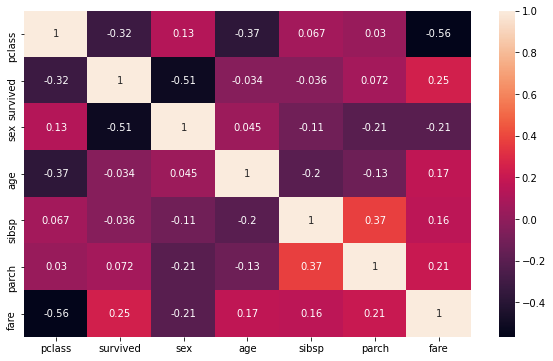

In [20]:
plt.figure(figsize = (10 , 6))
sns.heatmap(corr , annot = True)

<AxesSubplot:xlabel='pclass', ylabel='count'>

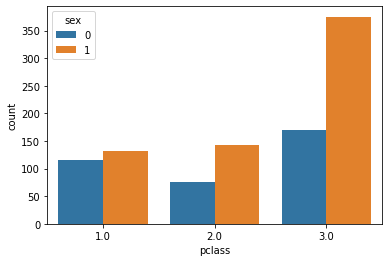

In [21]:
sns.countplot(data=train_data , x = 'pclass', hue = 'sex')

<AxesSubplot:xlabel='pclass', ylabel='count'>

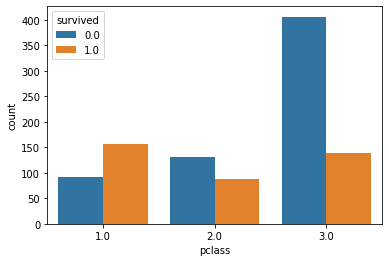

In [22]:
sns.countplot(data = train_data , x = 'pclass' , hue='survived')

<AxesSubplot:xlabel='survived', ylabel='count'>

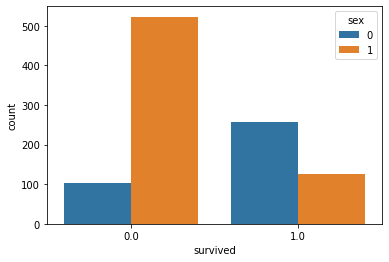

In [23]:
sns.countplot(data = train_data , x = 'survived' , hue = 'sex')

array([[<AxesSubplot:title={'center':'pclass'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>],
       [<AxesSubplot:title={'center':'fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

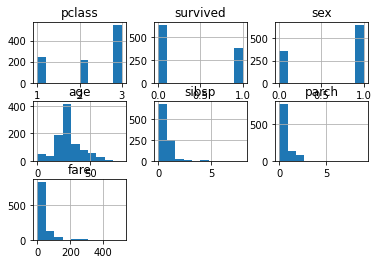

In [24]:

train_data.hist()

<AxesSubplot:xlabel='sibsp', ylabel='count'>

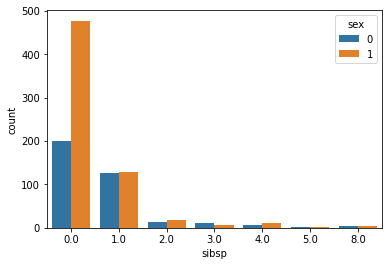

In [25]:
sns.countplot(data = train_data , x='sibsp' , hue='sex')

(array([ 55.,  37., 188., 414., 124.,  83.,  62.,  32.,  11.,   3.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

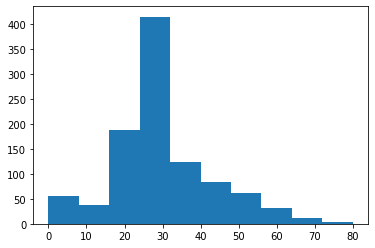

In [26]:
plt.hist(x = 'age' , data = train_data)

(array([819., 124.,  33.,   4.,  17.,   9.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

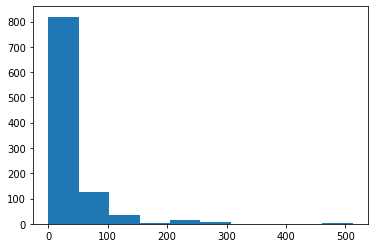

In [27]:
plt.hist(x = 'fare' , data = train_data)

<AxesSubplot:xlabel='parch', ylabel='count'>

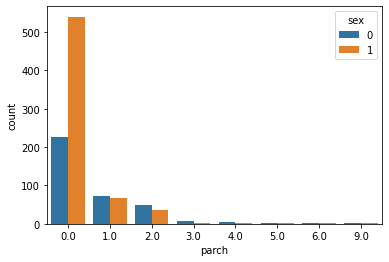

In [28]:
sns.countplot(data = train_data , x = 'parch' , hue='sex')

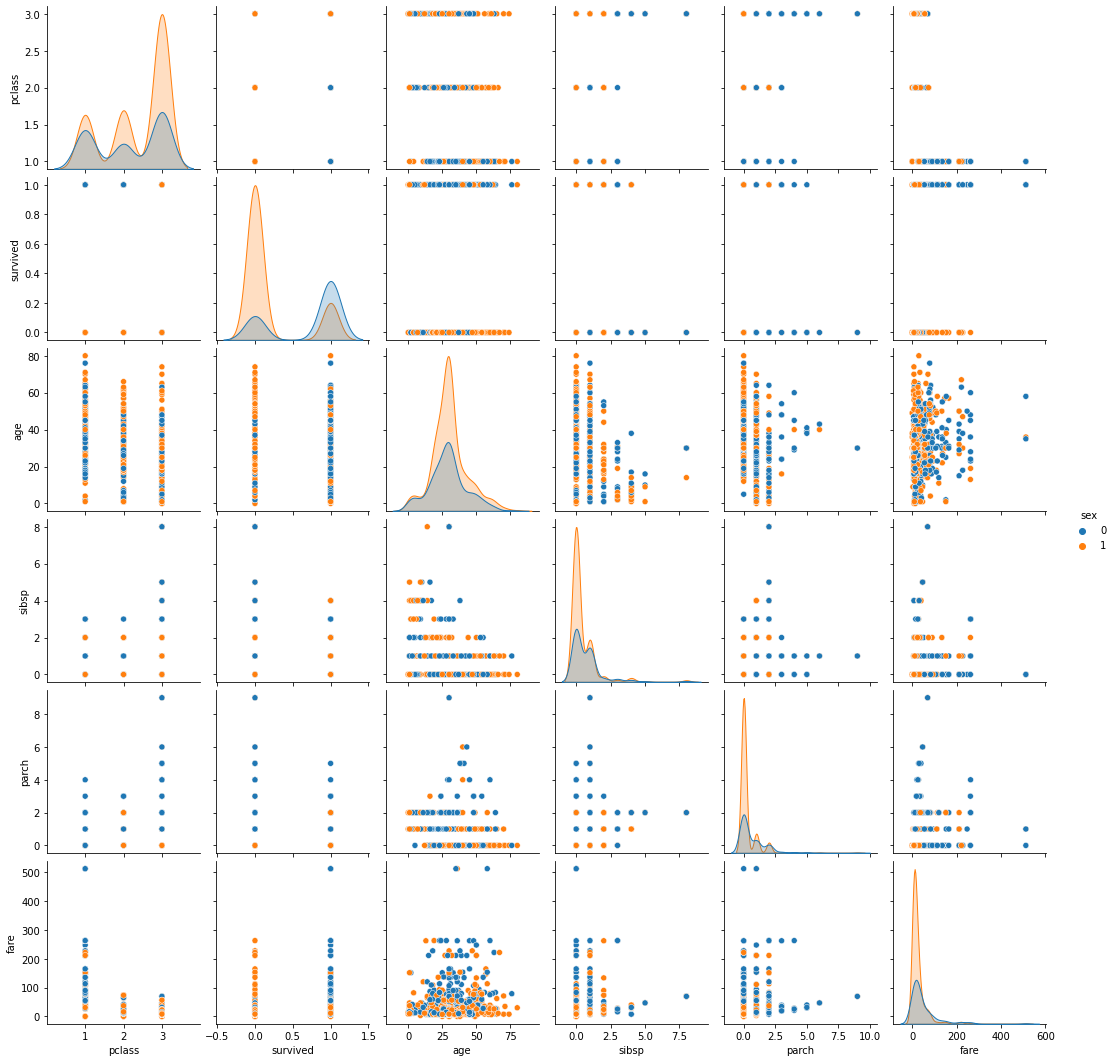

In [29]:
sns.pairplot(train_data , hue= 'sex')

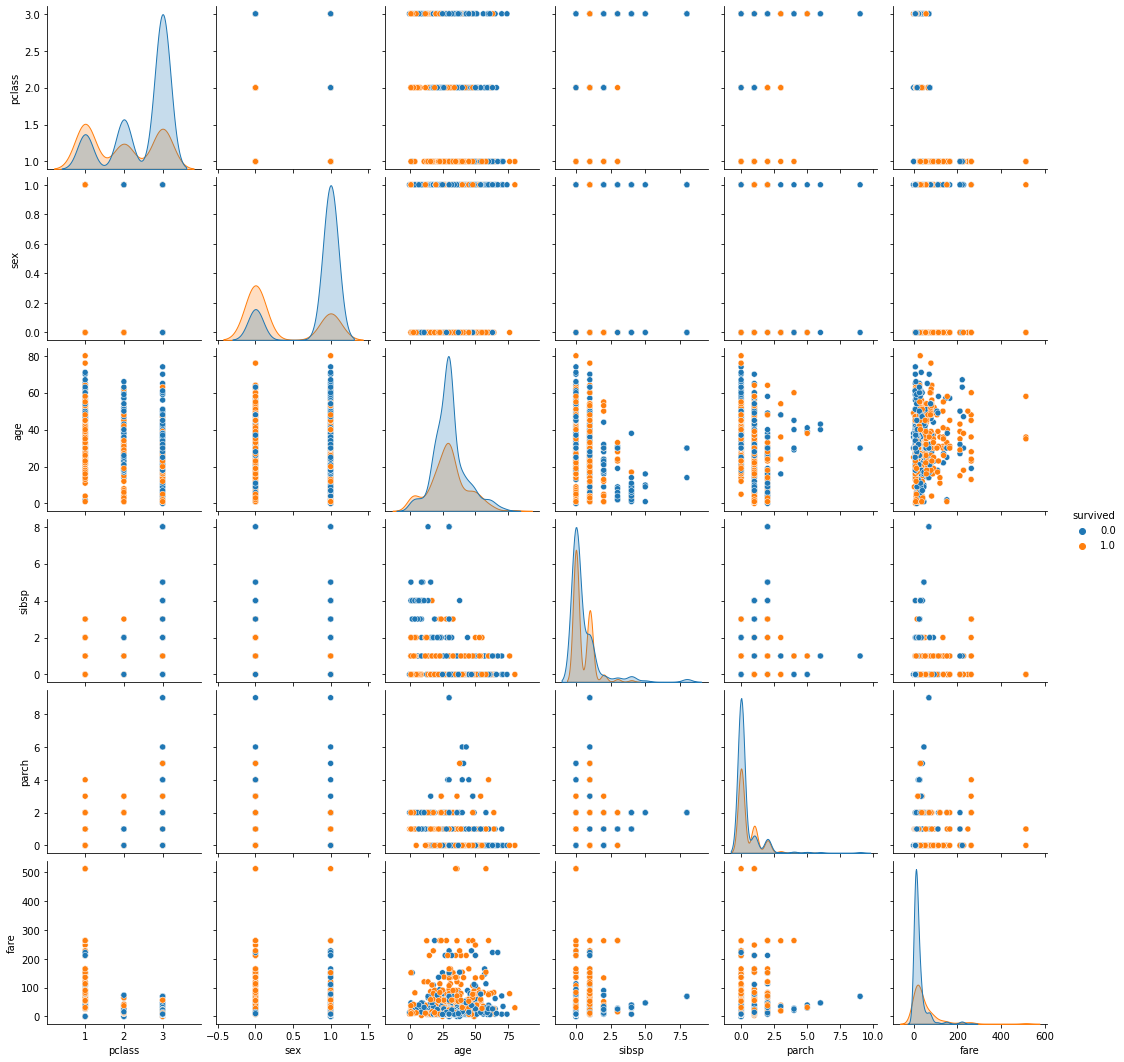

In [30]:
sns.pairplot(train_data , hue= 'survived')

In [31]:
x_train = train_data.drop(['survived'] , axis =1)
y_train = train_data['survived']

In [32]:
x_test = test_data

In [33]:
print(x_train.shape, y_train.shape)
print(x_test.shape)

(1009, 6) (1009,)
(300, 6)


# Write Algorithm to classify suviver in test_data

In [34]:
sk_tree = DecisionTreeClassifier(criterion='entropy' , max_depth=5)

In [35]:
sk_tree.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [36]:
y_pred = sk_tree.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [37]:
model_score = sk_tree.score(x_train , y_train)
print(model_score)

0.8275520317145689
